# Trabajo académico final escrito: Genera una aplicación de inteligencia artificial que use librerías de software libre a través de herramientas colaborativas

## Planteamiento de la actividad
* Seleccionar una plataforma: JupyterLab | Google Colab.
* Usar dos datasets, uno que tiene origen en un CSV y otro que está en una base de datos.
* Consumir la información de los datasets a través de la librería Pandas o similar.
* Realizar visualizaciones a través de Matplotlib / Bokeh / PyWalker.
* En el repositorio de GitHub, usted debe subir:
    * El dataset inicial que será usado.
    * El SQL de la base de datos.
    * El script/notebook que genera la base de datos (si es necesario).
    * El notebook donde se realizan los pasos descritos en la actividad.
    * El dataset final usado.
* En la wiki del repositorio de GitHub se debe crear el siguiente informe:
        1. Introducción / 2. Marco teórico de las tecnologías/librerías usadas / 3. Descripción del dataset usado / 4. Descripción de los pasos realizados en el proyecto / 4.1. Incluir una breve descripción de las visualizaciones generadas / 5. Conclusiones / 6. Bibliografía.



## Dataset
Este conjunto de datos (ml-latest-small) describe la actividad de calificación de 5 estrellas y etiquetado de texto libre de [MovieLens](http://movielens.org), un servicio de recomendación de películas. Contiene 100 836 calificaciones y 3683 aplicaciones de etiquetas en 9742 películas. Estos datos fueron generados por 610 usuarios entre el 29 de marzo de 1996 y el 24 de septiembre de 2018. Este conjunto de datos se generó el 26 de septiembre de 2018.

Los usuarios fueron seleccionados aleatoriamente para su inclusión. Todos los usuarios seleccionados habían calificado al menos 20 películas. No se incluye información demográfica. Cada usuario se representa mediante un ID y no se proporciona ninguna otra información.

Los datos se encuentran en los archivos `links.csv`, `movies.csv`, `ratings.csv` y `tags.csv`. A continuación, se ofrece más información sobre el contenido y el uso de todos estos archivos.

Este es un conjunto de datos *en desarrollo*. Por lo tanto, puede cambiar con el tiempo y no es un conjunto de datos adecuado para compartir resultados de investigación. Si lo desea, consulte los conjuntos de datos de referencia disponibles.

Este y otros conjuntos de datos de GroupLens están disponibles para su descarga pública en <http://grouplens.org/datasets/>.

Datos obtenidos para la tarea: https://files.grouplens.org/datasets/movielens/ml-32m.zip

## Importación de las librerias necesarias

In [2]:
#librerias de análisis de datos
import numpy as np
import pandas as pd

#librerias de visualización
import matplotlib.pyplot as plt
import seaborn as sns
from PIL.ImageColor import colormap
%matplotlib inline
#import pygwalker as pyg
from bokeh.plotting import figure, output_notebook, show #que muestra el dibujo en el libro
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

#libreria manejo de base de datos
import sqlite3

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Cambio de datos a una tabla de sqlite para lectura en el ejercicio.
conn = sqlite3.connect('ml_latest_small/database.db')
ratings_csv = pd.read_csv('ml_latest_small/ratings.csv', sep=',', header=0)
ratings_csv.to_sql("rating", conn, if_exists='replace', index=False)
conn.close()

## Leer y explorar datos

Lectura y visualización de los datos que se encuentran en las tablas descargadas

In [4]:
# Lectura de archivo movies.csv
movies = pd.read_csv('ml_latest_small/movies.csv', sep=',', header=0)
print("Información de los datos encontrados en el archivo movies.csv")
movies.info()
movies.head(30)

Información de los datos encontrados en el archivo movies.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
# Lectura de archivo links.csv
links = pd.read_csv('ml_latest_small/links.csv', sep=',', header=0)
print("Información de los datos encontrados en el archivo links.csv")
links.info()
links.head()

Información de los datos encontrados en el archivo links.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
# Lectura de archivo tags.csv
tags = pd.read_csv('ml_latest_small/tags.csv', sep=',', header=0)
print("Información de los datos encontrados en el archivo tags.csv")
tags.info()
tags.head(50)

Información de los datos encontrados en el archivo tags.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


In [8]:
# Lectura de tabla ratings que se encuentra dentro de la base de datos database.db
conn = sqlite3.connect('ml_latest_small/database.db')
ratings = pd.read_sql_query("SELECT * FROM rating", conn)
conn.close()
print("Información de la tabla 'rating' encontrados en el archivo database.db")
ratings.info()
ratings.head(30)

Información de la tabla 'rating' encontrados en el archivo database.db
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### Observaciones de los datos:
* Hay un total de 87585 peliculas (dataframe movies )
* Se tiene 32000204 calificaciones valorada de 0-5 estrellas por cada pelicula (dataframe ratings)
* Adicional se cuenta 2000072 comentarios tipo etiquetas por cada pelicula (dataframe tags)
* No se tiene claro la informacion presentada en el dataframe links por lo que no vamos a usar
* El userId es un identificador proporcionado por cada usuario
* El movieId es un identificador proporcianado por cada pelicula
* Las calificaciones tiene un dato tipo flotante el cual indica que puede ir con incrementos de 0.5 que van desde 0.0 estrellas a 5.0 estreallas
* En el archivo movies se tiene el nombre de la pelicula junto con la fecha de lanzamiento
* En el archivo movies en la columna de generos se tiene un lista separados por barras verticales.

## Difinición del proyecto

En base a los dataframe se realiza el siguiente análisis:

* Encontrar el año con mas péliculas estrenadas
* ¿Cuál es el género más común?
* Encuentra las calificaciones promedio otorgadas a cada película por diferentes usuarios.
* Película con la mayor cantidad de valoraciones.
* ¿Qué usuario ha calificado más películas y cuál es su calificación promedio?

In [9]:
# Creamos una nueva columna en donde se muestra el año del estreno
movies['year'] = movies['title'].str.extract('.*\((.*)\).*',expand = False) #consultar esta linea str.extract
movies.head(300)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
295,337,What's Eating Gilbert Grape (1993),Drama,1993
296,338,Virtuosity (1995),Action|Sci-Fi|Thriller,1995
297,339,While You Were Sleeping (1995),Comedy|Romance,1995
298,340,"War, The (1994)",Adventure|Drama|War,1994


In [10]:
# Con la ayuda de la libría Bokeh descubriremos el año que tubo mayor número de estrenos de películas

output_notebook()
movies_for_year = movies.groupby('year')['year'].count()
source = ColumnDataSource(data=dict(index = movies_for_year.index, values = movies_for_year.values ))
p = figure()
p.line(x='index', y='values', source=source)

p.title.text = 'Grafico de la Cantidad de Peliculas por año'
p.xaxis.axis_label = 'Año'
p.yaxis.axis_label = 'Cantidad de Estrenos'

hover = HoverTool()
hover.tooltips = [('Año','@index'),('Cantidad de Estrenos','@values')]

p.add_tools(hover)
show(p)


Loading BokehJS ...

### Resultado: Con la ayuda del grafico interactivo de la libreria bokeh se puede visualizar que en el pico mas alto correspondiente al año 2002 se tiene 311 estrenos:

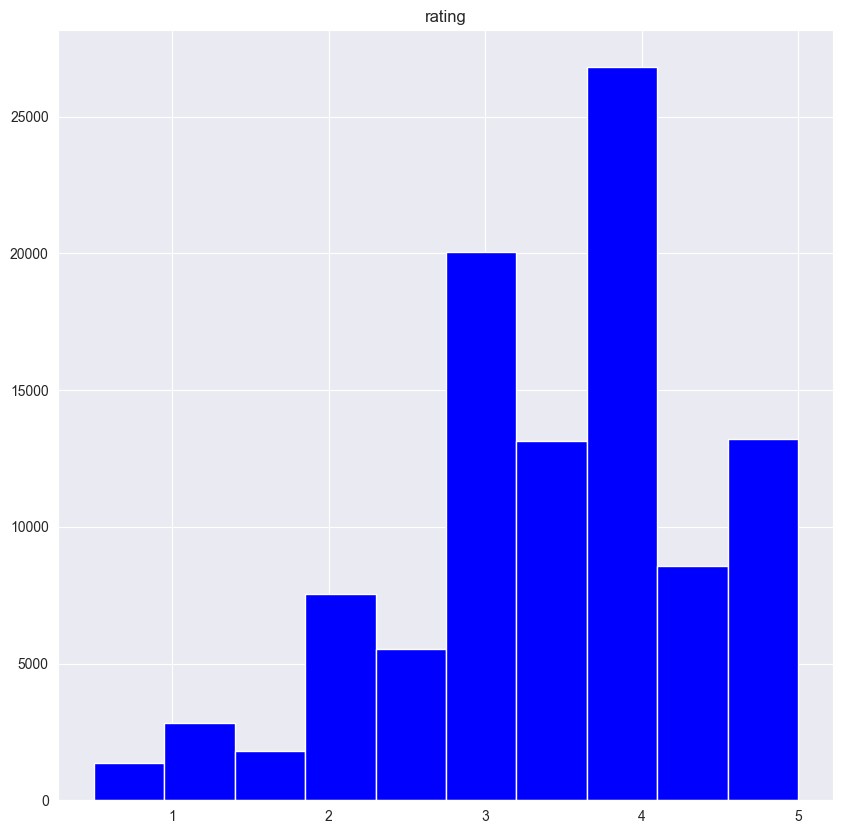

In [11]:
# Con la ayuda de la libreria matplotlib y en base al dataframe ratins, vamos buscar la calificaciones por los votos que mayor se a dado
ratings.hist(bins=10, figsize=(10, 10),column='rating', color='blue')
plt.show()

### Resultado: en la grafíca se observa que se tiene una calificaciones con mas votos son las de 4 estrellas con un valor mayor a 25000

In [12]:
#El dataframe movies y el dataframe ratings tiene en común el movieid por lo que estos dos dataframe serán unidos para realizar una sola table, y vemos el promedio de calificaiones
ratings_promedio= ratings.groupby("movieId")["rating"].mean()
movies=movies.merge(ratings_promedio, on="movieId",how="inner")
movies.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,3.071429


In [28]:
ratings_promedio= ratings.groupby("movieId")["rating"].mean()
ratings_promedio

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [14]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


#PyWalker.